# Preamble

These are not "real" model solutions. For more information on solutions in general you should see the model solutions in ```R```. 

This is mostly just something to help me remeber how this stuff goes and to learn how things work in python.

As such, the explanations are lacking and the code is not written to be particularily easy to understand.

However as there is express intrest in seeing how the exercises can be done in python, here they are.

In [1]:
from itertools import islice

from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

from mnist import MNIST

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("bright")

# Problem 1

### (a)

Given a set of $n$ numbers $x_1, \ldots, x_n$, with $x_i \in \mathbb{R}$, show that the value $x^∗$ that minimizes the *sum of squared errors*, i.e.

$$
x^∗ = \underset{x'}{arg min} \sum_{i = 1}^n (x_i − x')^2
$$

is given by the *average* of the $x_i$, i.e. $x^∗ = \sum_i x_i/n$. 

### (b)

Do the same for vectors $x_1,\ldots ,x_n$, where $x_i \in \mathbb{R}^p$. In other words, show that the minimum sum of squared distances 

$$
x^∗ = \underset{x'}{arg min} \sum_{i = 1}^n \lVert x_i − x'\rVert_2^2
$$

is given by the average vector $x^∗ = \sum_i x_i/n$.

# Problem 2

We consider hierarchical clustering on a toy data set consisting of seven data points in the Euclidean plane. The data points are $p_1 = (0.5, 2.0)$, $p_2 = (2.5, 3.0)$, $p_3 = (4.2, 0.7)$, $p_4 = (5.5, 0.3)$, $p_5 = (4.8, 3.5)$, $p_6 = (7.0, 2.5)$ and $p_7 = (8.5, 2.8)$.

The matrix of Euclidean distances between the data points is then as follows:

<table>
    <tr>
        <td></td><td>$p_1$</td><td>$p_2$</td><td>$p_3$</td><td>$p_4$</td><td>$p_5$</td><td>$p_6$</td><td>$p_7$</td>
    </tr>
    <tr>
        <td>$p_1$</td><td>$0$</td><td>$2.24$</td><td>$3.92$</td><td>$5.28$</td><td>$4.55$</td><td>$6.52$</td><td>$8.04$</td>
    </tr>
    <tr>
        <td>$p_2$</td><td>$2.24$</td><td>$0$</td><td>$2.86$</td><td>$4.04$</td><td>$2.35$</td><td>$4.53$</td><td>$6.00$</td>
    </tr>
    <tr>
        <td>$p_3$</td><td>$3.92$</td><td>$2.86$</td><td>$0$</td><td>$1.36$</td><td>$2.86$</td><td>$3.33$</td><td>$4.79$</td>
    </tr>
    <tr>
        <td>$p_4$</td><td>$5.28$</td><td>$4.04$</td><td>$1.36$</td><td>$0$</td><td>$3.28$</td><td>$2.66$</td><td>$3.91$</td>
    </tr>
    <tr>
        <td>$p_5$</td><td>$4.55$</td><td>$2.35$</td><td>$2.86$</td><td>$3.28$</td><td>$0$</td><td>$2.42$</td><td>$3.77$</td>
    </tr>
    <tr>
        <td>$p_6$</td><td>$6.52$</td><td>$4.53$</td><td>$3.33$</td><td>$2.66$</td><td>$2.42$</td><td>$0$</td><td>$1.53$</td>
    </tr>
    <tr>
        <td>$p_7$</td><td>$8.04$</td><td>$6.00$</td><td>$4.79$</td><td>$3.91$</td><td>$3.77$</td><td>$1.53$</td><td>$0$</td>
    </tr>
</table>

### (a)

Simulate  the  basic  agglomerative  hierarchical  clustering  by  hand  (so  not  using  R  or  other software) to this data using the single linkage notion of dissimilarity between clusters. Visualise the result as a dendrogram.

### (b)

Repeat the clustering using now complete linkage dissimilarity. Compare the results.

# Problem 3

In this problem you will implement the K-means algorithm, so don’t use an existing implementation (such as kmeans in R). Remember that you are allowed to use any programming language, but even in that case, don’t use an existing implementation of the algorithm itself.

### (a)

Write your own implementation of the so called Lloyd’s algorithm for $K$-means. The algorithm is explained in the slides and Algorithm 10.1 in the textbook.

This should be a function that takes as inputs the data matrix, and outputs the final cluster means and the assignments specifying which data vectors are assigned to which cluster after convergence of the algorithm.  (Use matrix operations wherever possible, avoiding explicit loops, to speed up the algorithm sufficiently for running the algorithm on the MNIST data below.)

Test the algorithm by clustering $n = 100$ random data points drawn from a bivariate standard normal distribution with mean $\mu = (0, 0)$ and covariance $$\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix}$$. Plot the results as a scatter plot where different clusters are shown in different colors. Repeat the experiment with the same data to see how much the clusters differ.

Let's create a ```K_means``` class similar to what sk-learning classes. It will have a constuctor that takes hyperparameters (here $k$ and maximum number of iterations), a ```fit``` function that takes data (and possibily intital centroids) as input and generates cluster centroids, a ```predict``` function that takes data and outputs a cluster assignment, and finally a ```fit_predict``` function that is a convenient shorthand.

The class is not particularily well optimized but seems sufficiently fast for MNIST

In [2]:
class K_means:
    def __init__(self, k, n_iter=300):
        self.k = k
        self.n_iter = n_iter
        self.centroids = None
        self.converged = False
        
    def fit_predict(self, x, centroids=None):
        self.fit(x, centroids)
        return self.predict(x)
    
    def fit(self, x, centroids=None):
        self.converged = False
        if centroids is None:
            y = np.random.randint(self.k, size=x.shape[0])
            self.centroids = self._calculate_centroids(x, y)
        else:
            self.centroids = centroids
        self._fit_iter(x)
        return self
    
    def _calculate_centroids(self, x, y):
        centroids = np.zeros((self.k, x.shape[1]))
        ex_counts = np.zeros(self.k)
        for yv, xv in zip(y, x):
            centroids[yv] += xv
            ex_counts[yv] += 1
        for i, c in enumerate(ex_counts):
            if c > 0:
                centroids[i] /= c
        return centroids
    
    def _fit_iter(self, x):
        for i in range(self.n_iter):
            y = self.predict(x)
            centroids = self._calculate_centroids(x, y)
            if np.array_equal(centroids, self.centroids):
                self.converged = True
                break
            self.centroids = centroids
            
    def predict(self, x):
        dists = cdist(x, self.centroids)
        y = np.argmin(dists, axis=1)
        return y

Now to test the clustering with some generated data:

Model converged: True


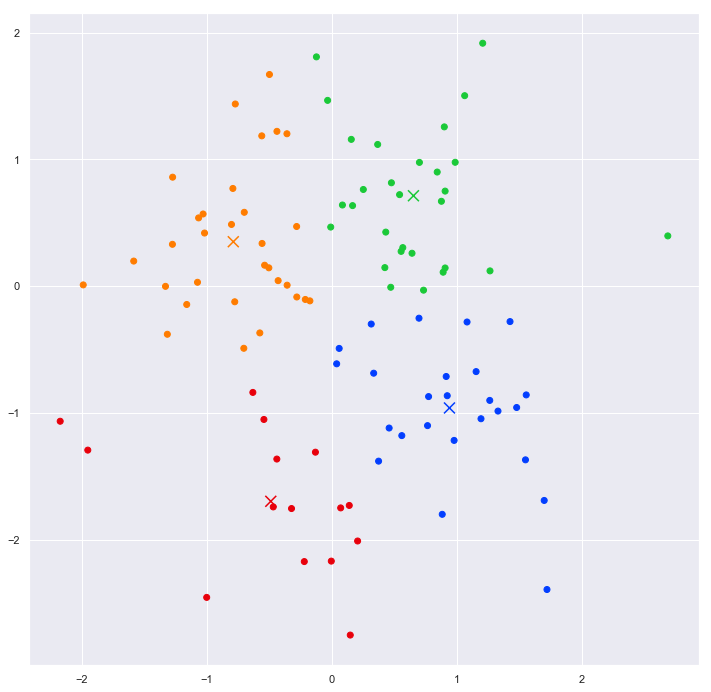

In [3]:
np.random.seed(1337)
k = 4
x = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=100)
model = K_means(k).fit(x)
y = model.predict(x)
print("Model converged:", model.converged)
plt.figure(figsize=(12, 12))
plt.scatter(x[:, 0], x[:, 1], c=["C{}".format(yv) for yv in y])
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c=["C{}".format(i) for i in range(k)], s=120, marker="x")
plt.show()

The model converged (yay) and output a fairly convincing clustering.

Now to do some more.

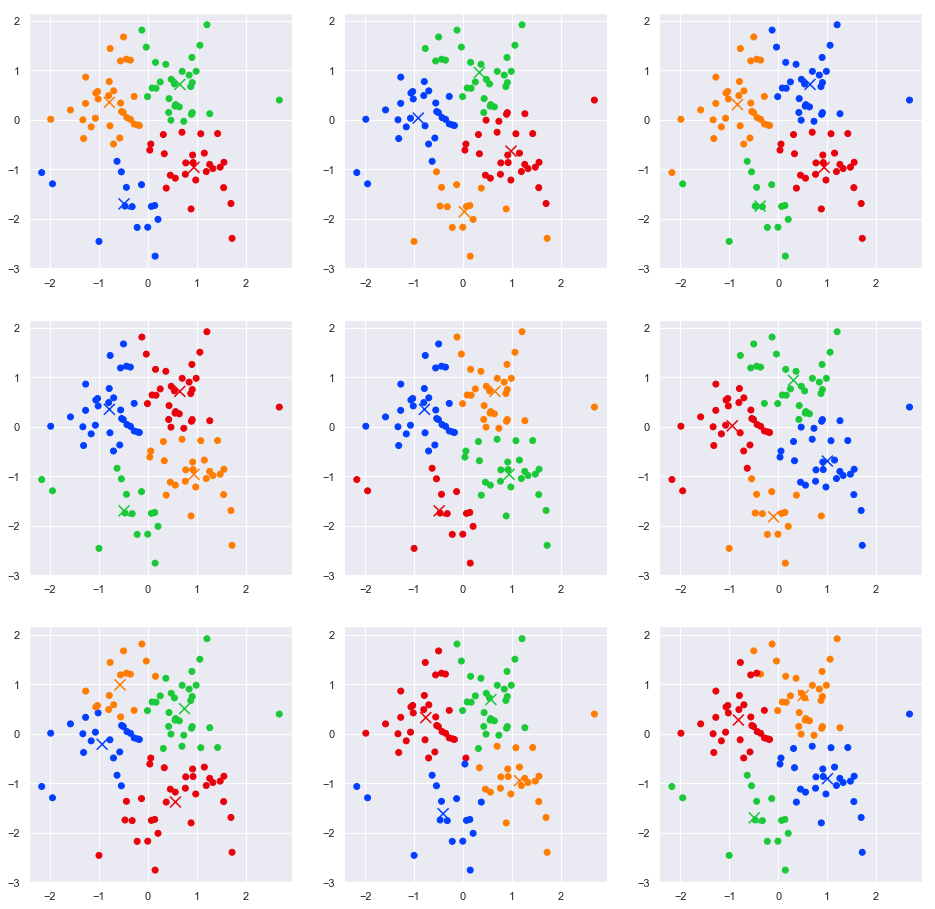

In [4]:
np.random.seed(42)
plt.figure(figsize=(16, 16))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    model = K_means(k)
    y = model.fit_predict(x)
    plt.scatter(x[:, 0], x[:, 1], c=["C{}".format(yv) for yv in y])
    plt.scatter(model.centroids[:, 0], 
                model.centroids[:, 1], 
                c=["C{}".format(i) for i in range(k)], 
                s=120, 
                marker="x")
plt.show()

Stuff scooted around a bit depending on the initial random position of the centroids.

### (b)

This wouldn’t be a proper ML course if we didn’t use the classic MNIST data! Download the classic MNIST handwritten digit database from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/), and load the data into R. Display the fifth training data instance on the screen to make sure you have succeeded. It should look more or less like a ’9’ (or a letter ‘a’ leaning to the right but these are all supposed to be digits 0–9).  Verify the that the correct class value, $y$, of the fifth training instance is indeed 9 by printing the value ```train$y[5]```
.

As has previously been stated: I'm lazy. So I didn't feel like figuring out the data encoding for MNIST and just installed a library instead.

In [5]:
mnist = MNIST("./datasets")
images, labels = mnist.load_training()

In [6]:
images = np.asarray(images)

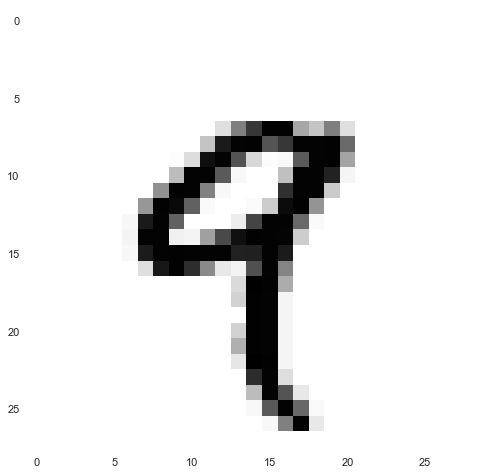

labels[4]: 9


In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(images[4].reshape((28, 28)), cmap="Greys")
plt.grid(False)
plt.show()
print("labels[4]:", labels[4])

Clearly the 9 we were looking for.

### (c)

Having loaded the data, discard all but the first 500 training data points. Run your $K$-means algorithm, using $K = 10$ clusters, with the initial cluster means equal to the first 10 images in the dataset. After convergence, visualize the cluster prototypes as an image showing the mean vector (mean grayscale value of each pixel).

Also visualize some of the images belonging to each cluster.

To what extent do the 10 clusters correspond to the 10 different digits?

model converged: True


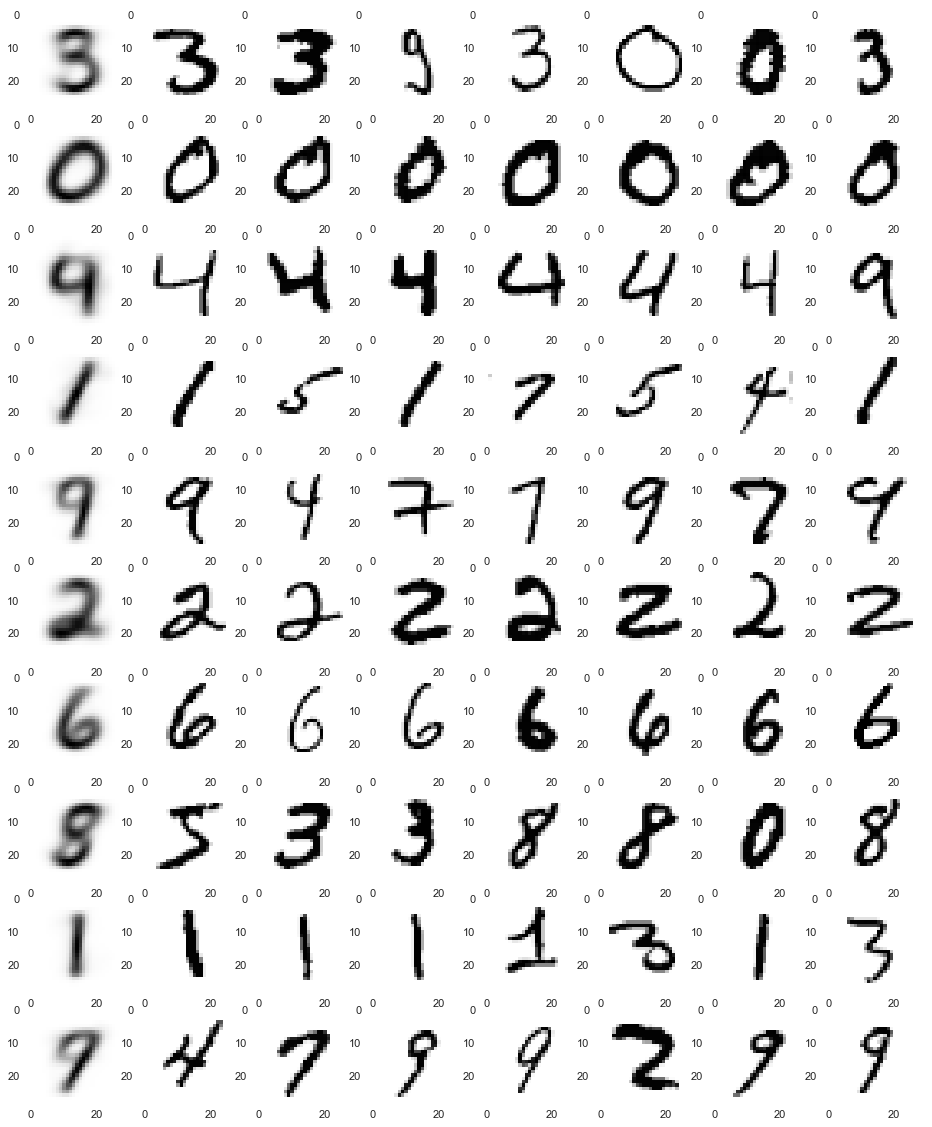

In [8]:
model = K_means(10)
y = model.fit_predict(images, images[:10])
print("model converged:", model.converged)
means = np.zeros((10, images.shape[1]))
counts = np.zeros(10)
for yv, xv in zip(y, images):
    means[yv] += xv
plt.figure(figsize=(16, 20))
for i in range(10):
    plt.subplot(10, 8, 1 + i * 8)
    plt.imshow(means[i].reshape((28, 28)), cmap="Greys")
    plt.grid(False)
    for j, idx in enumerate(islice((idx for idx in range(len(y)) if y[idx] == i), 7)):
        plt.subplot(10, 8, 2 + i * 8 + j)
        plt.imshow(images[idx].reshape((28, 28)), cmap="Greys")
        plt.grid(False)
plt.show()

It sort of works i guess...

### (d)

Re-run K-means but selecting the first instance of each class as the initial cluster mean (so that
the initial cluster means all represent distinct digits), and compare with the previous results.

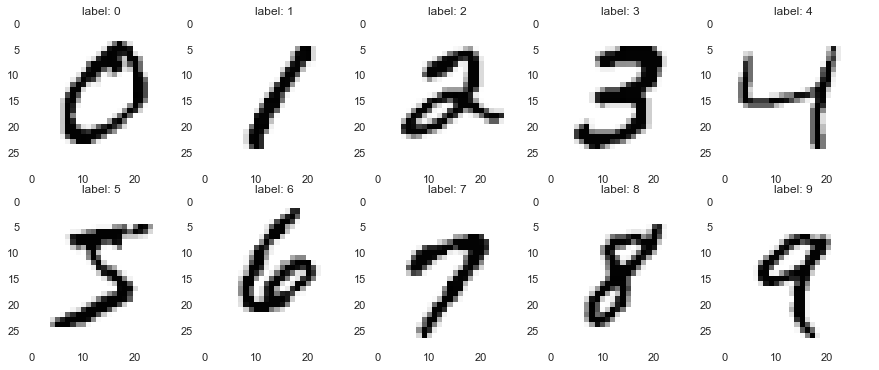

In [9]:
plt.figure(figsize=(15, 6))
centroids = np.zeros((10, 28**2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    for j, l in enumerate(labels):
        if l == i:
            centroids[i] = images[j]
            plt.imshow(centroids[i].reshape((28, 28)), cmap="Greys")
            plt.grid(False)
            plt.title("label: " + str(l))
            break
plt.show()

model converged: True


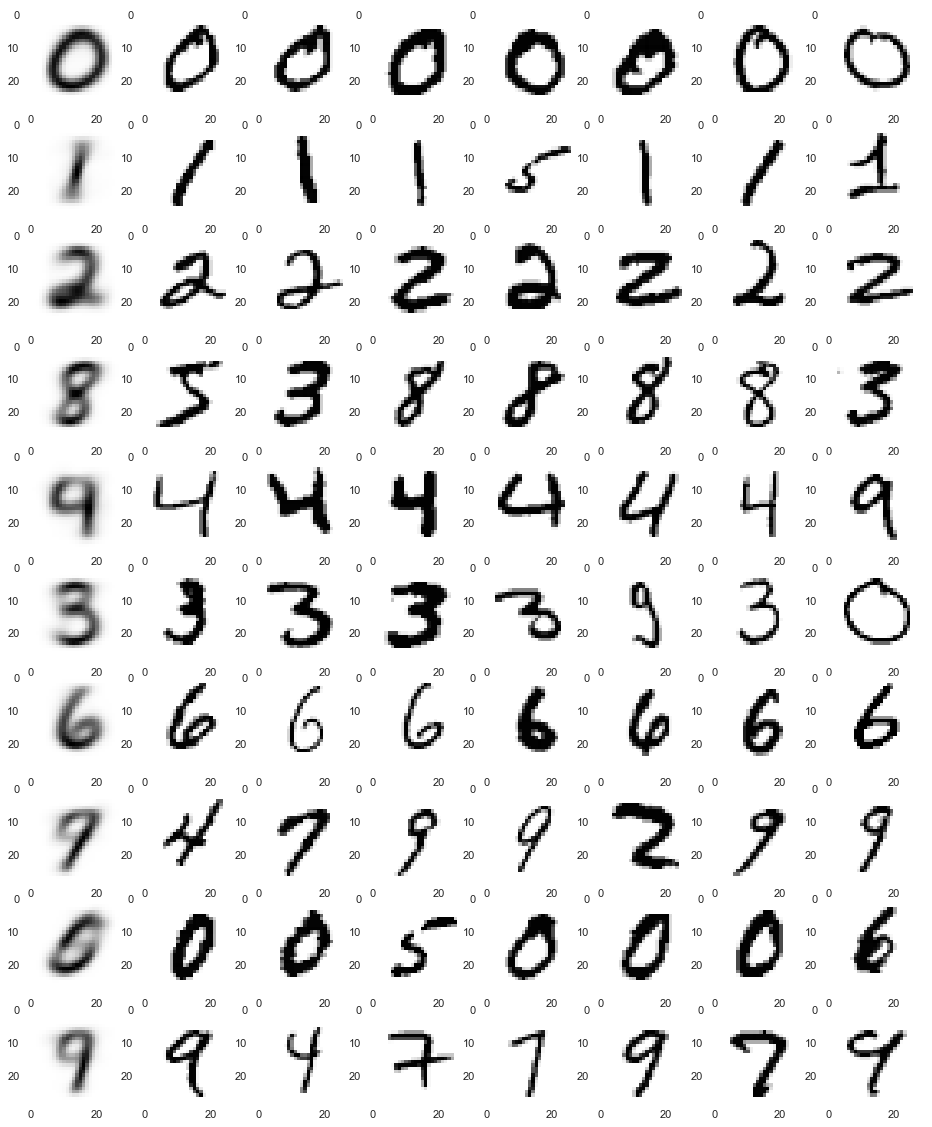

In [10]:
model = K_means(10)
y = model.fit_predict(images, centroids)
print("model converged:", model.converged)
means = np.zeros((10, images.shape[1]))
counts = np.zeros(10)
for yv, xv in zip(y, images):
    means[yv] += xv
plt.figure(figsize=(16, 20))
for i in range(10):
    plt.subplot(10, 8, 1 + i * 8)
    plt.imshow(means[i].reshape((28, 28)), cmap="Greys")
    plt.grid(False)
    for j, idx in enumerate(islice((idx for idx in range(len(y)) if y[idx] == i), 7)):
        plt.subplot(10, 8, 2 + i * 8 + j)
        plt.imshow(images[idx].reshape((28, 28)), cmap="Greys")
        plt.grid(False)
plt.show()

Some of these are really good, but some are not.